Judul Studi Kasus Virus Corona di Jakarta dengan Algoritma Naive Bayes
Nama : Florence Agnes Margareth
NIM : A11.2020.12470

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
from google.colab import drive
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
drive.mount('/content/drive')
Kasus_Covid_Jakarta_df=pd.read_csv('/content/drive/MyDrive/Machine Learning/ Kasus_Covid_Jakarta.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Kasus_Covid_Jakarta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   periode_data        538 non-null    int64 
 1   id_kel              538 non-null    object
 2   nama_provinsi       538 non-null    object
 3   nama_kota           538 non-null    object
 4   nama_kecamatan      538 non-null    object
 5   nama_kelurahan      538 non-null    object
 6   odp                 538 non-null    int64 
 7   proses_pemantauan   538 non-null    int64 
 8   selesai_pemantauan  538 non-null    int64 
 9   odp_meninggal       538 non-null    int64 
 10  pdp                 538 non-null    int64 
 11  masih_dirawat       538 non-null    int64 
 12  pulang_dan_sehat    538 non-null    int64 
 13  pdp_meninggal       538 non-null    int64 
 14  positif             538 non-null    int64 
 15  dirawat             538 non-null    int64 
 16  sembuh              538 no

In [ ]:
Kasus_Covid_Jakarta_df.head(10)

,periode_data,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,odp,proses_pemantauan,selesai_pemantauan,odp_meninggal,pdp,masih_dirawat,pulang_dan_sehat,pdp_meninggal,positif,dirawat,sembuh,meninggal,self_isolation,keterangan
0,202007,3173071001,DKI JAKARTA,JAKARTA BARAT,PALMERAH,PALMERAH,440,14,37,2,387,0,0,0,1,0,1,861,162,699
1,202007,3175011004,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,PAL MERIAM,111,5,0,2,104,1,0,1,1,0,1,327,9,318
2,202007,3172051001,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,PADEMANGAN TIMUR,211,2,11,2,196,0,0,0,12,0,12,428,22,406
3,202007,3172051002,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,PADEMANGAN BARAT,825,17,159,5,644,0,0,0,5,1,4,1480,122,1358
4,202007,3175101004,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,MUNJUL,75,1,1,0,73,0,0,0,2,0,2,82,15,67
5,202007,3173081002,DKI JAKARTA,JAKARTA BARAT,KEMBANGAN,MERUYA UTARA,94,5,4,6,79,0,0,0,3,0,3,220,44,176
6,202007,3173081003,DKI JAKARTA,JAKARTA BARAT,KEMBANGAN,MERUYA SELATAN,82,6,3,1,72,0,0,0,2,0,2,213,81,132
7,202007,3174011003,DKI JAKARTA,JAKARTA SELATAN,TEBET,MENTENG DALAM,137,2,16,4,115,0,0,0,11,0,11,295,20,275
8,202007,3174021005,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,MENTENG ATAS,136,0,7,3,126,0,0,0,40,6,34,702,151,551
9,202007,3171061001,DKI JAKARTA,JAKARTA PUSAT,MENTENG,MENTENG,97,1,7,2,87,1,0,1,1,0,1,307,29,278


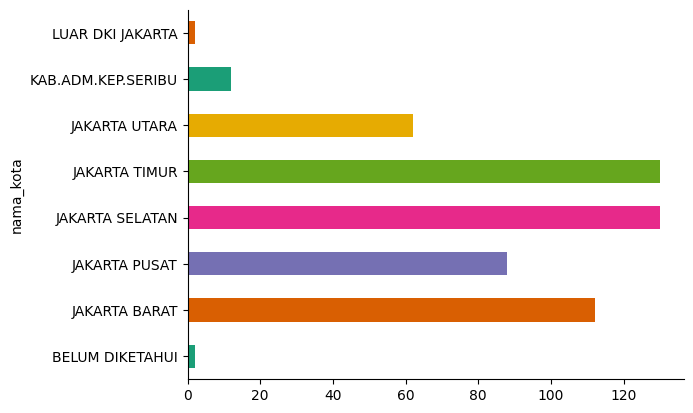

In [ ]:
# @title nama_kota

from matplotlib import pyplot as plt
import seaborn as sns
Kasus_Covid_Jakarta_df.groupby('nama_kota').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
Kasus_Covid_Jakarta_df.tail(10)

,periode_data,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,odp,proses_pemantauan,selesai_pemantauan,odp_meninggal,pdp,masih_dirawat,pulang_dan_sehat,pdp_meninggal,positif,dirawat,sembuh,meninggal,self_isolation,keterangan
528,202007,3174011006,DKI JAKARTA,JAKARTA SELATAN,TEBET,MANGGARAI SELATAN,51,1,5,2,43,0,0,0,0,6,0,6,222,23
529,202007,3173031003,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,MAPHAR,84,2,1,1,80,0,0,0,0,5,0,5,138,11
530,202007,3172041003,DKI JAKARTA,JAKARTA UTARA,CILINCING,MARUNDA,77,5,12,0,60,0,0,0,0,0,0,0,89,12
531,202007,3174071001,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,MELAWAI,8,0,0,0,8,0,0,0,0,1,0,1,21,7
532,202007,3171061001,DKI JAKARTA,JAKARTA PUSAT,MENTENG,MENTENG,90,3,1,2,84,1,0,0,1,1,0,1,286,37
533,202007,3174021005,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,MENTENG ATAS,126,4,15,3,104,0,0,0,0,33,2,31,544,128
534,202007,3174011003,DKI JAKARTA,JAKARTA SELATAN,TEBET,MENTENG DALAM,117,7,4,4,102,0,0,0,0,11,0,11,275,23
535,202007,3173081003,DKI JAKARTA,JAKARTA BARAT,KEMBANGAN,MERUYA SELATAN,76,2,3,1,70,0,0,0,0,2,0,2,142,23
536,202007,3173081002,DKI JAKARTA,JAKARTA BARAT,KEMBANGAN,MERUYA UTARA,89,2,4,6,77,0,0,0,0,3,0,3,166,23
537,202007,3175101004,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,MUNJUL,73,2,5,0,66,0,0,0,0,2,0,2,69,10


In [ ]:
Kasus_Covid_Jakarta_df.isnull().sum()

periode_data          0
id_kel                0
nama_provinsi         0
nama_kota             0
nama_kecamatan        0
nama_kelurahan        0
odp                   0
proses_pemantauan     0
selesai_pemantauan    0
odp_meninggal         0
pdp                   0
masih_dirawat         0
pulang_dan_sehat      0
pdp_meninggal         0
positif               0
dirawat               0
sembuh                0
meninggal             0
self_isolation        0
keterangan            0
dtype: int64

In [ ]:
Kasus_Covid_Jakarta_df.describe()

,periode_data,odp,proses_pemantauan,selesai_pemantauan,odp_meninggal,pdp,masih_dirawat,pulang_dan_sehat,pdp_meninggal,positif,dirawat,sembuh,meninggal,self_isolation,keterangan
count,538.0,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,202007.0,208.981413,5.994424,6.269517,8.215613,188.501859,1.245353,1.096654,0.078067,3.795539,3.724907,3.641264,183.459108,179.581784,176.472119
std,0.0,936.365971,22.212491,16.975057,99.125703,838.443317,25.311821,25.264079,0.500877,15.840776,14.784566,14.615861,676.533207,614.752123,620.055951
min,202007.0,6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202007.0,72.000000,2.000000,1.000000,1.000000,61.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,17.000000
50%,202007.0,108.500000,4.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,84.500000,74.500000
75%,202007.0,163.000000,7.000000,6.000000,3.000000,144.750000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,248.500000,214.750000,211.750000
max,202007.0,11182.000000,391.000000,275.000000,1627.000000,10392.000000,587.000000,586.000000,10.000000,307.000000,276.000000,275.000000,13783.000000,12048.000000,12442.000000


In [ ]:
Kasus_Covid_Jakarta_df.dtypes

periode_data           int64
id_kel                object
nama_provinsi         object
nama_kota             object
nama_kecamatan        object
nama_kelurahan        object
odp                    int64
proses_pemantauan      int64
selesai_pemantauan     int64
odp_meninggal          int64
pdp                    int64
masih_dirawat          int64
pulang_dan_sehat       int64
pdp_meninggal          int64
positif                int64
dirawat                int64
sembuh                 int64
meninggal              int64
self_isolation         int64
keterangan             int64
dtype: object

In [ ]:
Kasus_Covid_Jakarta_df.describe(include='all')

,periode_data,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,odp,proses_pemantauan,selesai_pemantauan,odp_meninggal,pdp,masih_dirawat,pulang_dan_sehat,pdp_meninggal,positif,dirawat,sembuh,meninggal,self_isolation,keterangan
count,538.0,538,538,538,538,538,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
unique,NaN,269,3,8,46,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3173071001,DKI JAKARTA,JAKARTA TIMUR,TAMBORA,PALMERAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,534,130,22,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,202007.0,NaN,NaN,NaN,NaN,NaN,208.981413,5.994424,6.269517,8.215613,188.501859,1.245353,1.096654,0.078067,3.795539,3.724907,3.641264,183.459108,179.581784,176.472119
std,0.0,NaN,NaN,NaN,NaN,NaN,936.365971,22.212491,16.975057,99.125703,838.443317,25.311821,25.264079,0.500877,15.840776,14.784566,14.615861,676.533207,614.752123,620.055951
min,202007.0,NaN,NaN,NaN,NaN,NaN,6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202007.0,NaN,NaN,NaN,NaN,NaN,72.000000,2.000000,1.000000,1.000000,61.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,17.000000
50%,202007.0,NaN,NaN,NaN,NaN,NaN,108.500000,4.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,84.500000,74.500000
75%,202007.0,NaN,NaN,NaN,NaN,NaN,163.000000,7.000000,6.000000,3.000000,144.750000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,248.500000,214.750000,211.750000


In [ ]:
Kasus_Covid_Jakarta_df["periode_data"].value_counts()

periode_data
202007    538
Name: count, dtype: int64

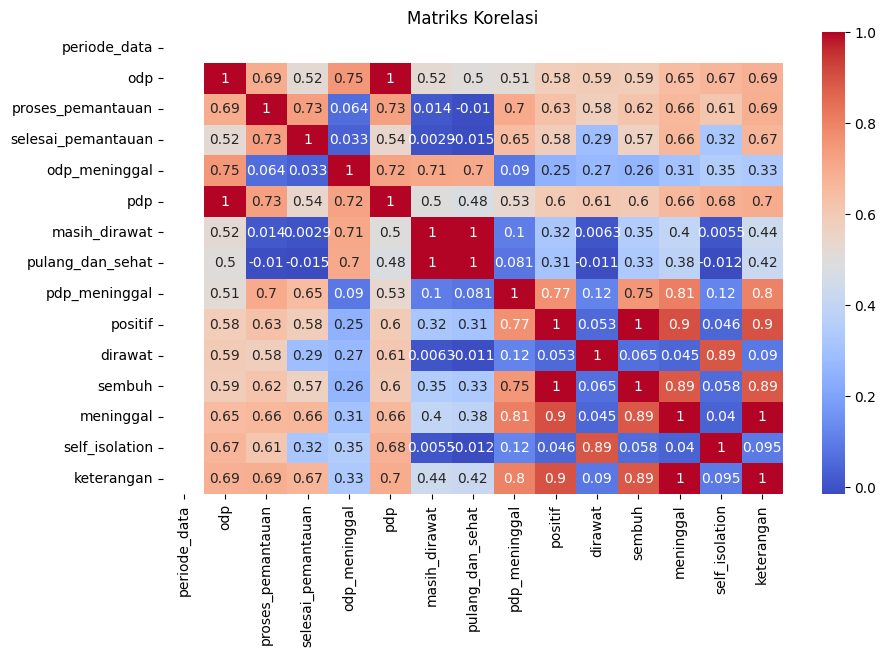

In [ ]:
# Buat salinan DataFrame dan hapus kolom non-numerik
Kasus_Covid_Jakarta_numerik = Kasus_Covid_Jakarta_df.select_dtypes(include=['float64', 'int64']).copy()

plt.figure(figsize=(10, 6))
sns.heatmap(Kasus_Covid_Jakarta_numerik.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
target_column = 'periode_data'
X = Kasus_Covid_Jakarta_df.drop(target_column, axis=1)
y = Kasus_Covid_Jakarta_df[target_column]

In [ ]:
target_column = 'periode_data'
X = Kasus_Covid_Jakarta_df.drop(target_column, axis=1)
y = Kasus_Covid_Jakarta_df[target_column]

# Select only numeric columns before imputation
X_numeric = X.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

In [ ]:
print(X.isnull().sum())

id_kel                0
nama_provinsi         0
nama_kota             0
nama_kecamatan        0
nama_kelurahan        0
odp                   0
proses_pemantauan     0
selesai_pemantauan    0
odp_meninggal         0
pdp                   0
masih_dirawat         0
pulang_dan_sehat      0
pdp_meninggal         0
positif               0
dirawat               0
sembuh                0
meninggal             0
self_isolation        0
keterangan            0
dtype: int64


In [ ]:
# Drop non-numeric columns before scaling
X_numeric = X.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)

# If you need to add the non-numeric columns back, you can do so later:
X_scaled['nama_provinsi'] = X['nama_provinsi']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Drop non-numeric columns before splitting and scaling
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) # Use transform, not fit_transform for test data

# Fit the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train) # Use scaled training data

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Akurasi Model: 100.00%
Classification Report:
              precision    recall  f1-score   support

      202007       1.00      1.00      1.00       108

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



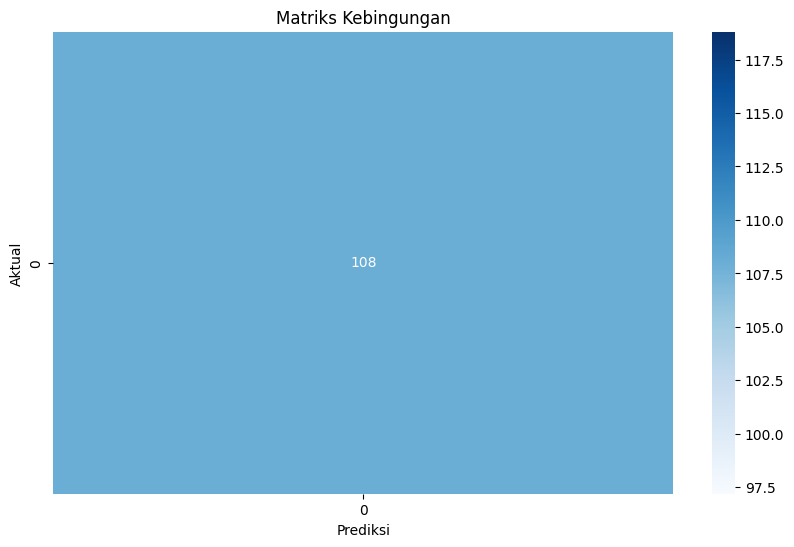

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriks Kebingungan')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

2


    A[Mulai] --> B[Memuat Dataset]
    B --> C[Validasi Data]
    C --> D[Visualisasi Data]
    D --> E[Pemilihan Fitur dan Label]
    E --> F[Pembersihan Data]
    F --> G[Transformasi Data]
    G --> H[Pembagian Data]
    H --> I[Pelatihan Model Naive Bayes]
    I --> J[Evaluasi Model]
    J --> K[Selesai]

    C -->|Mengecek Missing Values| C1[Menggantikan Nilai NaN]
    D -->|Membuat Histogram dan Matriks Korelasi| D1[Memahami Distribusi dan Korelasi]
    E -->|Menentukan Fitur Relevan| E1[Memilih Kolom Target]
    F -->|Imputasi Median| F1[Data Bersih]
    G -->|Scaling Data| G1[Data Siap]
    H -->|Membagi Menjadi Train dan Test Set| H1[Data Terbagi]
    I -->|Melatih Model dengan Data Train| I1[Model Terlatih]
    J -->|Mengukur Akurasi, Membuat Matriks Kebingungan| J1[Hasil Evaluasi]


3. Penjelasan Dataset, EDA, dan Proses Features Dataset
Penjelasan Dataset: Dataset ini berisi data harian kasus COVID-19 per kelurahan di DKI Jakarta pada bulan Juli 2020, dengan berbagai kategori seperti ODP, PDP, kasus positif, sembuh, meninggal, dan  masih ada lainnya.

Exploratory Data Analysis (EDA):

Memahami distribusi data.
Mengidentifikasi missing values.
Mengetahui korelasi antar variabel.
Proses Features Dataset:

Menangani missing values.
Transformasi data jika diperlukan.
Feature engineering untuk menambah variabel baru yang relevan.
4. Proses Learning / Modeling
Memilih model machine learning yang tepat.
Split dataset menjadi training dan testing set.
Melatih model dengan data training.
Evaluasi model dengan data testing.
5. Performa Model
Menggunakan metrik evaluasi untuk mengukur performa model (seperti akurasi, precision, recall, F1-score, dll.).
Membandingkan performa beberapa model jika diperlukan.
6. Diskusi Hasil dan Kesimpulan
Membahas hasil yang diperoleh dari model.
Menarik kesimpulan berdasarkan hasil evaluasi.
Memberikan rekomendasi atau tindakan lebih lanjut berdasarkan analisis data.
Mari kita mulai dengan langkah pertama, yaitu penjelasan dataset dan EDA.